Project Overview

We are going to apply a predictive algorithm to a political dataset where you classify the party affiliation of United States congressmen based on their voting records.We'll be working with a dataset obtained from the UCI Machine Learning Repository consisting of votes made by US House of Representatives Congressmen. Our goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. 

Citation

I have added notes for my own learning as I worked through this dataset. These notes are from the learning videos of Data School and the instructor is Kevin Markham (@justmarkham)

In [1]:
#Getting Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load the Data
df = pd.read_csv('house-votes-84.data',index_col=None,header=None,na_values = '?')
df.columns = ['Party',
   'Infants', 
   'Water-project',
   'Budget',
   'Physician',
   'El-salvador',
   'Religion',
   'Satellite',
   'Nicaragua',
   'Missile',
   'Immigration',
   'Synfuels',
   'Education',
   'Superfund',
   'Crime',
   'Duty-free',
   'Export']

In [3]:
#Describe the data
df.head()



,Party,Infants,Water-project,Budget,Physician,El-salvador,Religion,Satellite,Nicaragua,Missile,Immigration,Synfuels,Education,Superfund,Crime,Duty-free,Export
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
Party            435 non-null object
Infants          423 non-null object
Water-project    387 non-null object
Budget           424 non-null object
Physician        424 non-null object
El-salvador      420 non-null object
Religion         424 non-null object
Satellite        421 non-null object
Nicaragua        420 non-null object
Missile          413 non-null object
Immigration      428 non-null object
Synfuels         414 non-null object
Education        404 non-null object
Superfund        410 non-null object
Crime            418 non-null object
Duty-free        407 non-null object
Export           331 non-null object
dtypes: object(17)
memory usage: 57.9+ KB


In [5]:
df.shape

(435, 17)

In [6]:
#View the count of Nans in each factor

df.isnull().sum().sort_values(ascending=False)


Export           104
Water-project     48
Education         31
Duty-free         28
Superfund         25
Missile           22
Synfuels          21
Crime             17
El-salvador       15
Nicaragua         15
Satellite         14
Infants           12
Religion          11
Physician         11
Budget            11
Immigration        7
Party              0
dtype: int64

In [7]:
#Examining the datatypes
df.dtypes


Party            object
Infants          object
Water-project    object
Budget           object
Physician        object
El-salvador      object
Religion         object
Satellite        object
Nicaragua        object
Missile          object
Immigration      object
Synfuels         object
Education        object
Superfund        object
Crime            object
Duty-free        object
Export           object
dtype: object

In [8]:
#Make a copy of the original dataset and work on the new copy
df1=df.copy(deep=True)

#Leaving this code in even though it is not required. This was to replace the missing values (?) with np.nan but giving the parameter 'na_values = ?' while loading the dataset will do the job

#df1.replace('?',np.nan,inplace=True)



In [9]:
#Replace 'y' by 1 and'n' by 0 (By running the replace command, the data type of all the factors got converted from object to flaoatint64. 

df1.replace({'n': 0,'y': 1},inplace=True)
print(df1.head())
df1.dtypes



        Party  Infants  Water-project  Budget  Physician  El-salvador  \
0  republican      0.0            1.0     0.0        1.0          1.0   
1  republican      0.0            1.0     0.0        1.0          1.0   
2    democrat      NaN            1.0     1.0        NaN          1.0   
3    democrat      0.0            1.0     1.0        0.0          NaN   
4    democrat      1.0            1.0     1.0        0.0          1.0   

   Religion  Satellite  Nicaragua  Missile  Immigration  Synfuels  Education  \
0       1.0        0.0        0.0      0.0          1.0       NaN        1.0   
1       1.0        0.0        0.0      0.0          0.0       0.0        1.0   
2       1.0        0.0        0.0      0.0          0.0       1.0        0.0   
3       1.0        0.0        0.0      0.0          0.0       1.0        0.0   
4       1.0        0.0        0.0      0.0          0.0       1.0        NaN   

   Superfund  Crime  Duty-free  Export  
0        1.0    1.0        0.0     1.0 

Party             object
Infants          float64
Water-project    float64
Budget           float64
Physician        float64
El-salvador      float64
Religion         float64
Satellite        float64
Nicaragua        float64
Missile          float64
Immigration      float64
Synfuels         float64
Education        float64
Superfund        float64
Crime            float64
Duty-free        float64
Export           float64
dtype: object

In [10]:
#As Export column has missing values for a large percentage of records this column will be dropped
df1.drop(['Export'],axis=1,inplace=True)

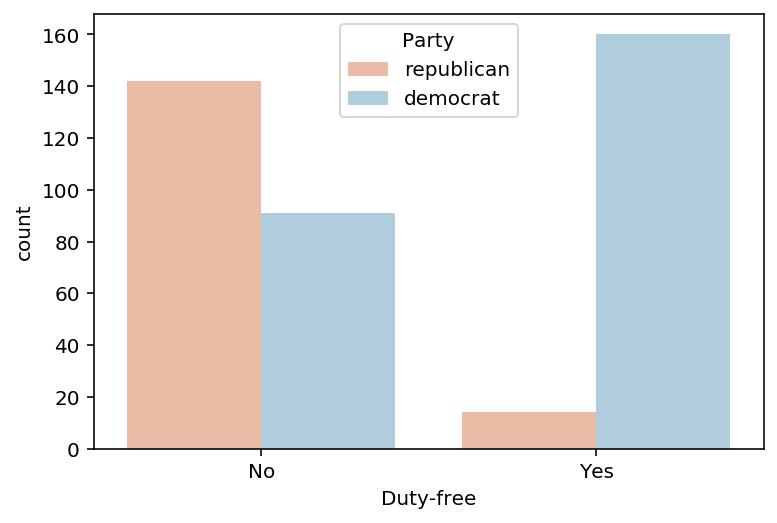

In [11]:
#For the remaining factors with missing values I created a function that will display a countplot for each party. This will help with choosing what value to fill missing values in for each factor.For eg, here's a sample plot for the factor Duty-free. The Republican party is marked by Red and Democratic by blue. As you can see there is a resounding difference in the way each party voted for Duty-free. Similarly I've created count plots for all other factors
plt.figure()
sns.countplot(x='Duty-free', hue='Party', data=df1, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [12]:
# function to display countplot for a factor i.e Democrate Vs Republicans on each issue/factor

def countplot(column, dataframe):
    plt.figure()
    sns.countplot(x=dataframe[column], hue='Party', data=dataframe, palette='RdBu')
    plt.title(column)
    plt.xticks([0,1], ['No', 'Yes'],rotation=45)
    plt.show()

In [13]:
# I've taken out 'Party' from the list of columns to be plotted as that is our response vector
factor_cols = df1.columns[1:]
factor_cols

Index(['Infants', 'Water-project', 'Budget', 'Physician', 'El-salvador',
       'Religion', 'Satellite', 'Nicaragua', 'Missile', 'Immigration',
       'Synfuels', 'Education', 'Superfund', 'Crime', 'Duty-free'],
      dtype='object')

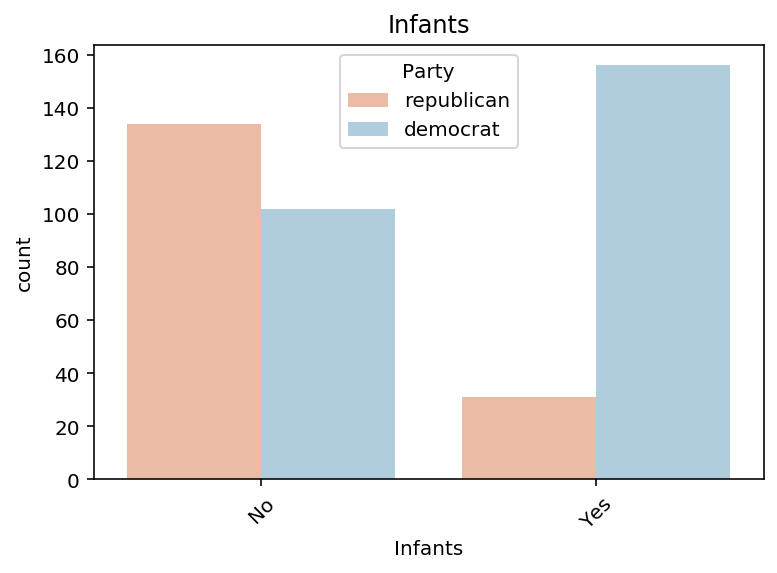

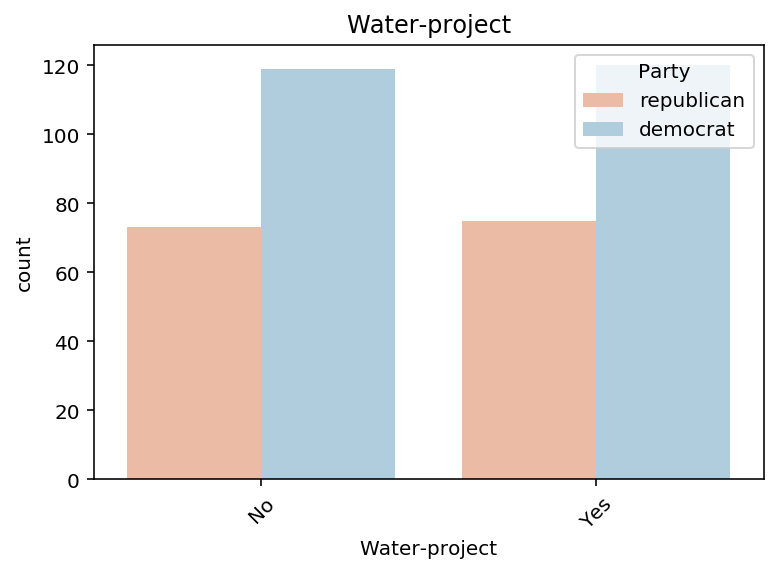

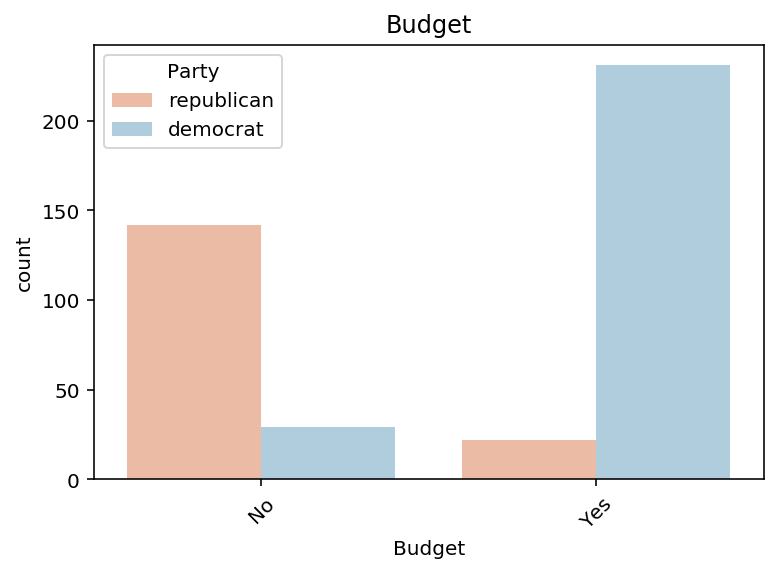

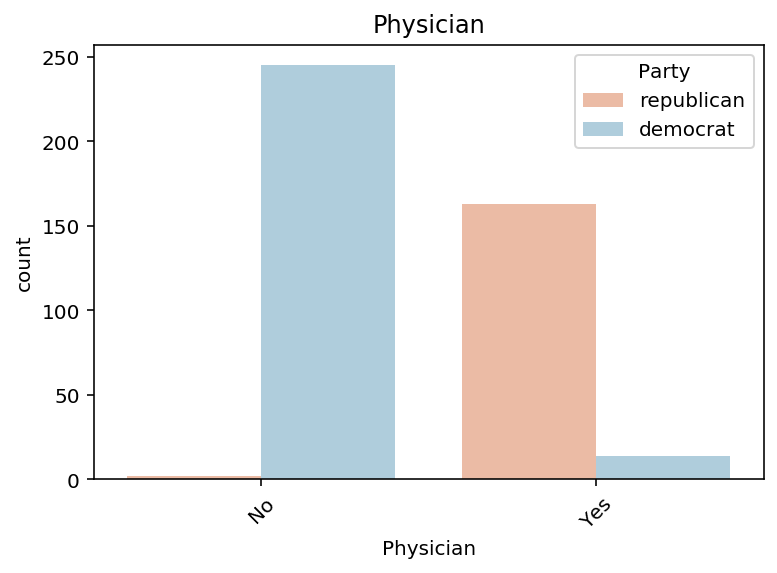

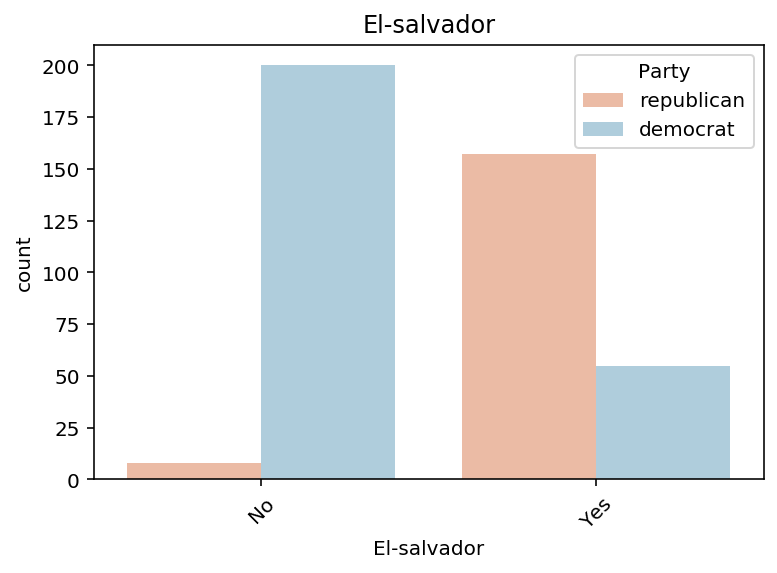

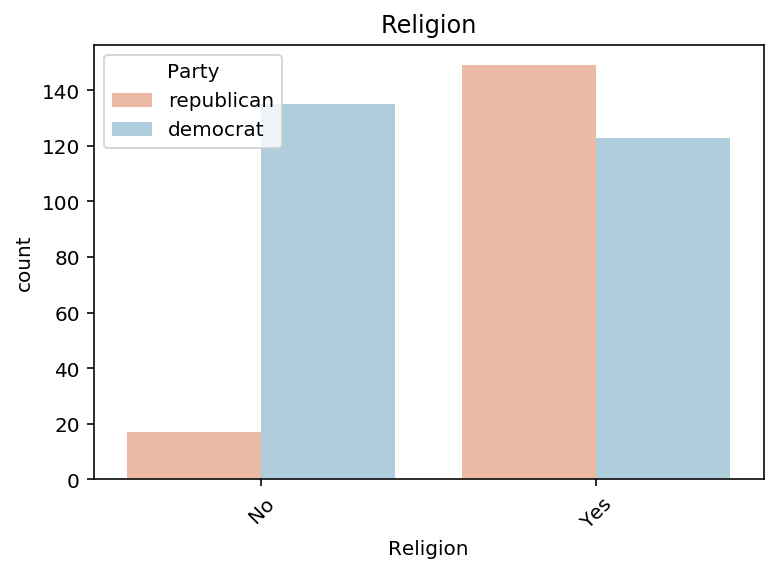

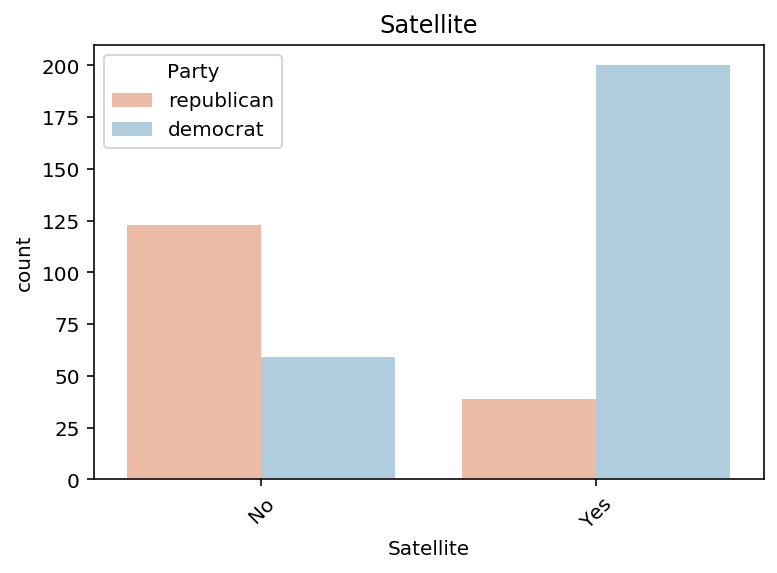

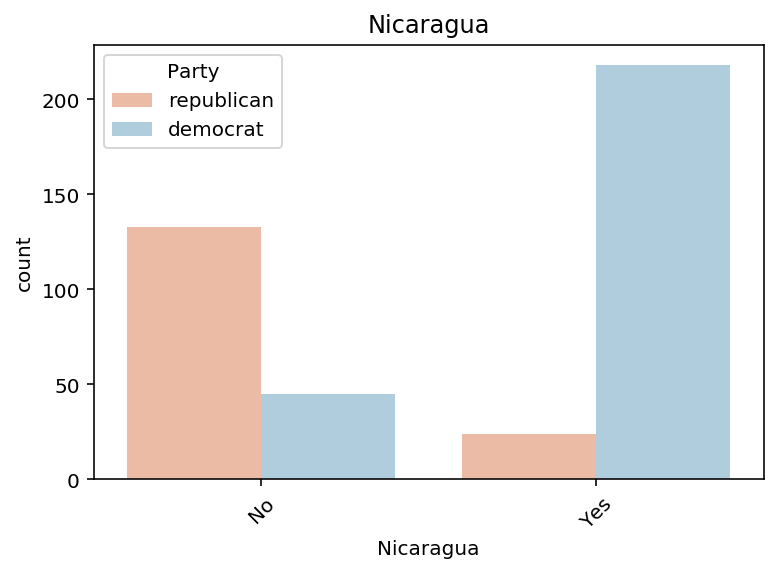

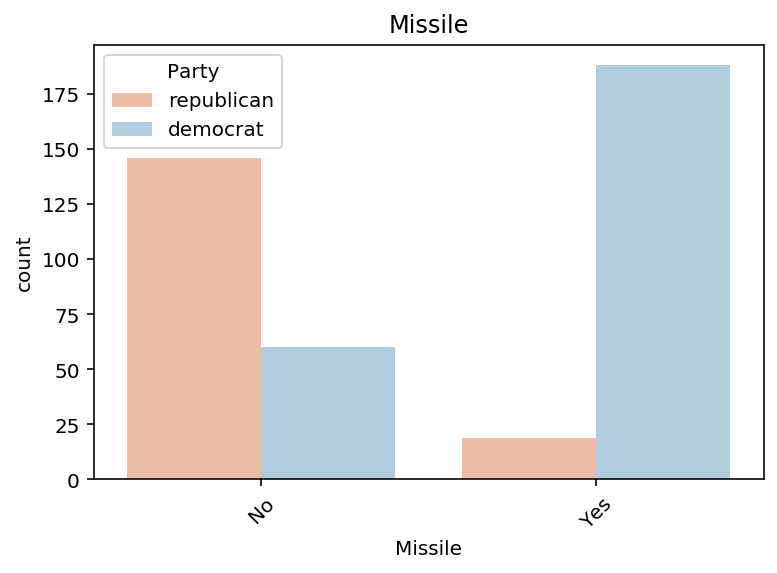

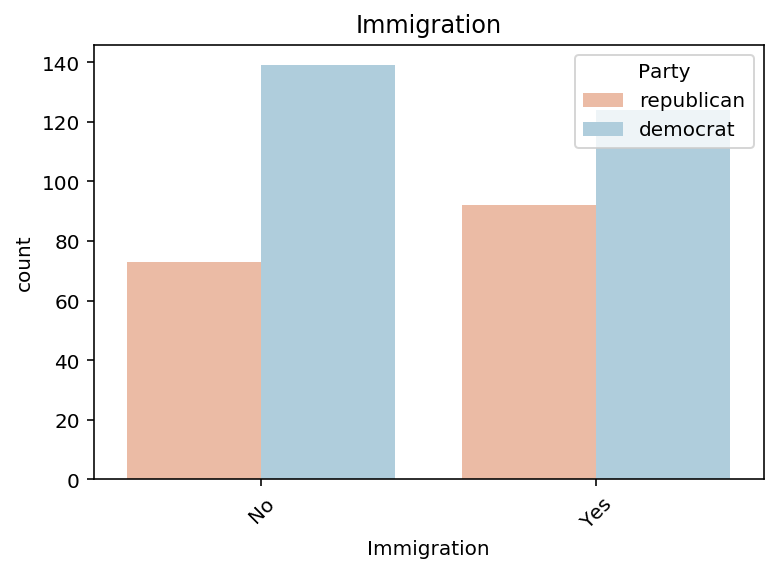

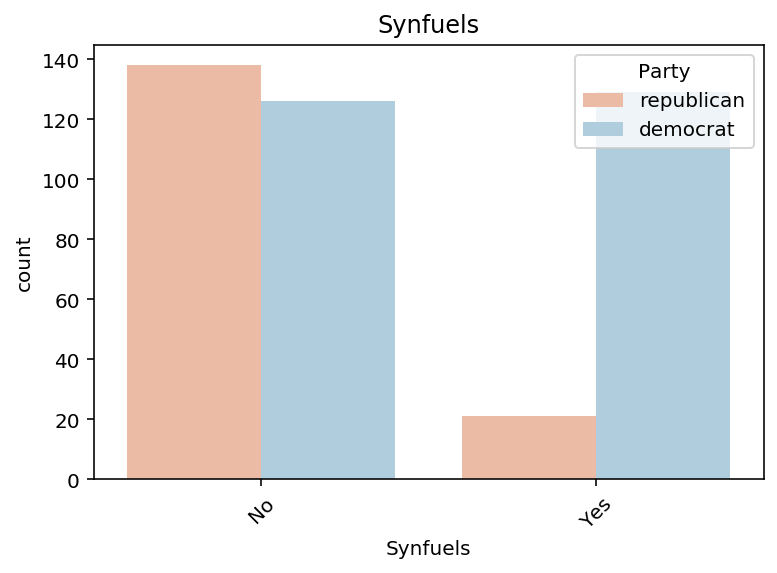

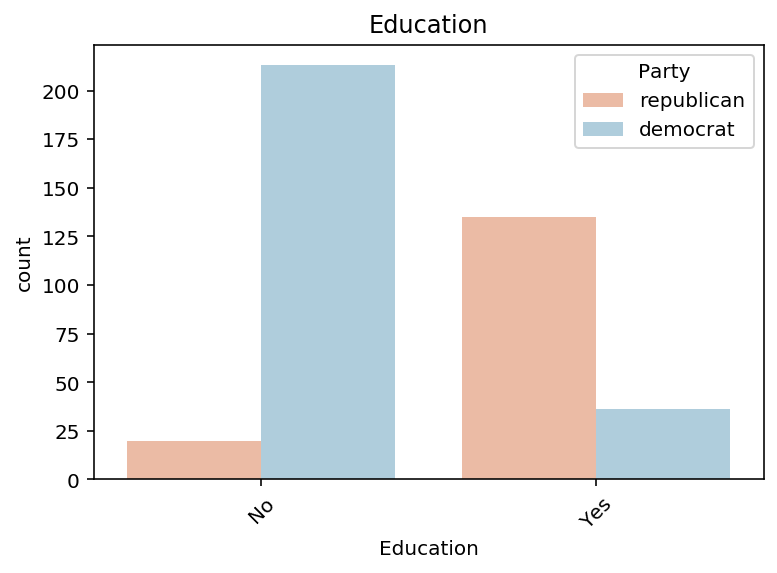

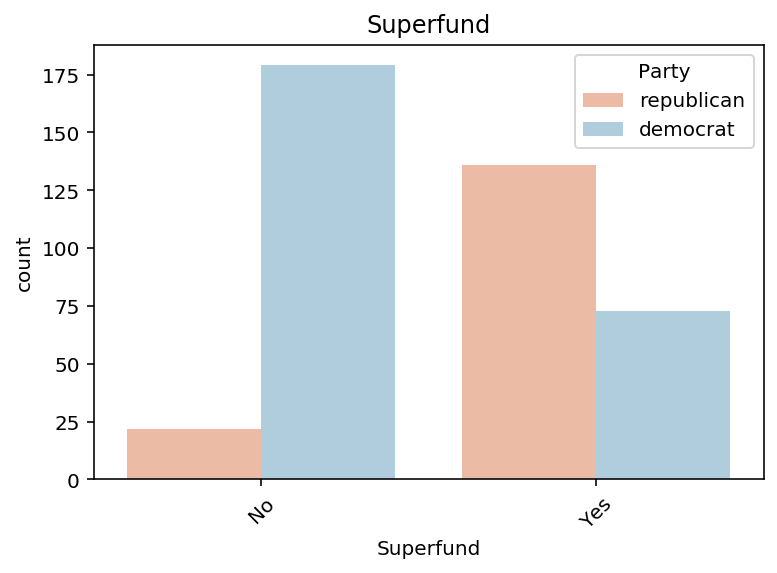

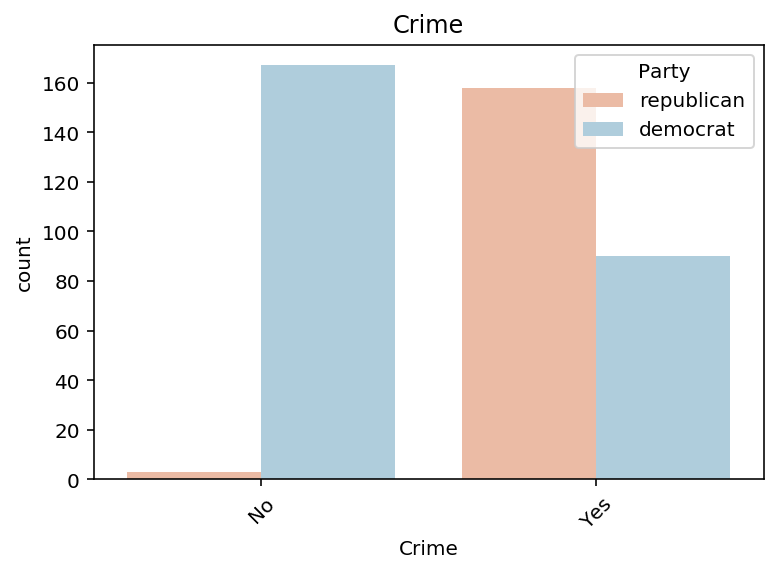

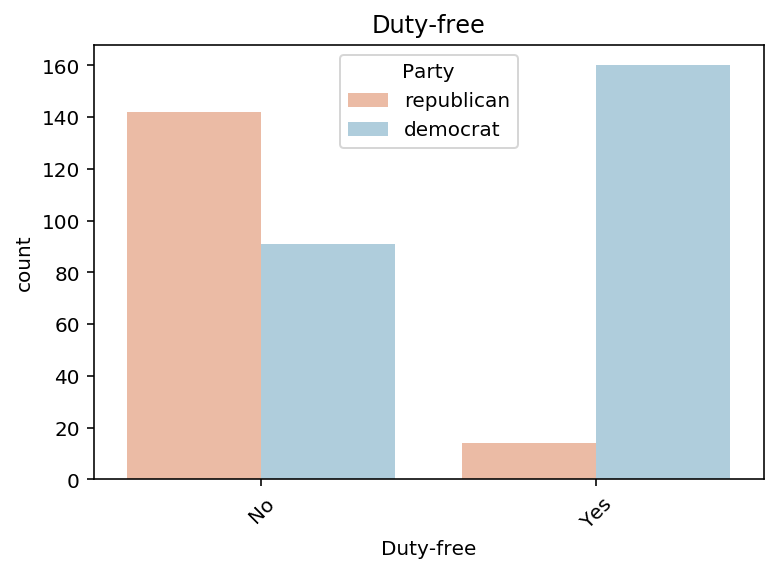

In [14]:
# Iterate the countplot for every factor in the dataset
for col in factor_cols:
      countplot(col,df1)

In [15]:
#The countplot for Water Project shows that equal number of democrats and Republicans voted against and in favour and therefore is inconclusive. Therefore I'm taking this factor out of the dataframe for the predictive model and and reset factor_cols to get the list of column names from the latest modified dataset. 
df1.drop(['Water-project'],axis=1,inplace=True)
factor_cols = df1.columns[1:]

In [16]:
#Check to see if Water-project was removed
print(df1.head())

        Party  Infants  Budget  Physician  El-salvador  Religion  Satellite  \
0  republican      0.0     0.0        1.0          1.0       1.0        0.0   
1  republican      0.0     0.0        1.0          1.0       1.0        0.0   
2    democrat      NaN     1.0        NaN          1.0       1.0        0.0   
3    democrat      0.0     1.0        0.0          NaN       1.0        0.0   
4    democrat      1.0     1.0        0.0          1.0       1.0        0.0   

   Nicaragua  Missile  Immigration  Synfuels  Education  Superfund  Crime  \
0        0.0      0.0          1.0       NaN        1.0        1.0    1.0   
1        0.0      0.0          0.0       0.0        1.0        1.0    1.0   
2        0.0      0.0          0.0       1.0        0.0        1.0    1.0   
3        0.0      0.0          0.0       1.0        0.0        1.0    0.0   
4        0.0      0.0          0.0       1.0        NaN        1.0    1.0   

   Duty-free  
0        0.0  
1        0.0  
2        0.0  
3 

#For all other factors I've updated the missing values with the mode or the value that most people voted for. The function below 
1. Reads every row of the dataset df1
2. Gets the corresponding 'Party' of that row
3. Calculates the mode of that column for rows pertaining to the party from step #2
4. Updates the value in that row with the mode obtained through step 3 if there is a missing value. Ideally, iterrows meathod does not allow to update the original dataframe, so I used the command 'dataframe.at' to do an inplace update

#This function is then iterated over every column of the dataset


In [17]:
# function to retrive and update the mode ( most frequent value) of the party for a factor

def fillpartymode(column,dataframe) :
    for index,row in dataframe.iterrows():
 #      print(row)
        party = row['Party']
 #      print ("Party is ", party)
        df1_subset = df1[df1['Party'] == party].reset_index() 
        value = df1_subset.loc[:,column].mode()
        if pd.isna(row[column]):
 #          print("Filled Nan with ", value) 
            dataframe.at[index, column] = value
            
           

In [18]:
# Iterate the fillna module for every factor in the dataset
for col in factor_cols:
      print('Column:',col)  
      fillpartymode(col,df1)
      print (df1[col].value_counts(dropna=False)) 
      


Column: Infants


0.0    239
1.0    196
Name: Infants, dtype: int64
Column: Budget


1.0    260
0.0    175
Name: Budget, dtype: int64
Column: Physician


0.0    255
1.0    180
Name: Physician, dtype: int64
Column: El-salvador


0.0    220
1.0    215
Name: El-salvador, dtype: int64
Column: Religion


1.0    274
0.0    161
Name: Religion, dtype: int64
Column: Satellite


1.0    247
0.0    188
Name: Satellite, dtype: int64
Column: Nicaragua


1.0    246
0.0    189
Name: Nicaragua, dtype: int64
Column: Missile


1.0    226
0.0    209
Name: Missile, dtype: int64
Column: Immigration


1.0    219
0.0    216
Name: Immigration, dtype: int64
Column: Synfuels


0.0    273
1.0    162
Name: Synfuels, dtype: int64
Column: Education


0.0    251
1.0    184
Name: Education, dtype: int64
Column: Superfund


1.0    219
0.0    216
Name: Superfund, dtype: int64
Column: Crime


1.0    255
0.0    180
Name: Crime, dtype: int64
Column: Duty-free


0.0    245
1.0    190
Name: Duty-free, dtype: int64


In [19]:
#Check to see if there are still missing values. The function din't seem to work for the first column Infants ( odd !). So I had to update the missing value in Infants with the median value
df1.isnull().sum()
#df1.loc[:, df1.isnull().any()] (lists the column with null values)

Party          0
Infants        0
Budget         0
Physician      0
El-salvador    0
Religion       0
Satellite      0
Nicaragua      0
Missile        0
Immigration    0
Synfuels       0
Education      0
Superfund      0
Crime          0
Duty-free      0
dtype: int64

In [22]:
#Now that we've cleaned the dtaaset and filled the missing values, It is time to build the classifier.I've used a k-Nearest Neighbors classifier to the voting dataset, 
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

First let's train and test the entire dataset

1. Train the model on the entire dataset.
2. Test the model on the same dataset, and evaluate how well we did by comparing the predicted response values with the true response values.

In [23]:
# Create arrays for the features and the response variable
y = df1['Party'].values
X = df1.drop('Party', axis=1).values

In [24]:
#Create an instance of the estimator. 
knn = KNeighborsClassifier(n_neighbors=6)

In [25]:
#Fit the model with the data
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [26]:
# predict the response value for the observations in X
y_pred = knn.predict(X)

In [27]:
# check how many predictions were generated
len(y_pred)

435

In [28]:
# compute classification accuracy for the knn classifier model (Known as training accuracy when you train and test the model on the same data)
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.960919540229885


The Accuracy score is 96%
Problems with training and testing on the same data
1. Goal is to estimate likely performance of a model on out-of-sample data
2. But, maximizing training accuracy rewards overly complex models that won't necessarily generalize
3. Unnecessarily complex models overfit the training data

Evaluation procedure #2: Train/test split
1. Split the dataset into two pieces: a training set and a testing set.
2. Train the model on the training set.
3. Test the model on the testing set, and evaluate how well we did.

In [29]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [30]:
# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 6)

In [31]:
# Fit the classifier to the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [32]:
#Make predictions on the training set
y_pred = knn.predict(X_test)

In [33]:
# compute classification accuracy for the knn classifier model
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9655172413793104


In [34]:
# Print the accuracy (Another way to get the Accuracy score)
print(knn.score(X_test, y_test))

0.9655172413793104


#Repeat for knn = 7

In [35]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

#Make predictions on the training set
y_pred = knn.predict(X_test)

# compute classification accuracy for the knn classifier model
print(metrics.accuracy_score(y_test, y_pred))


0.9655172413793104


Text(0, 0.5, 'Testing Accuracy')

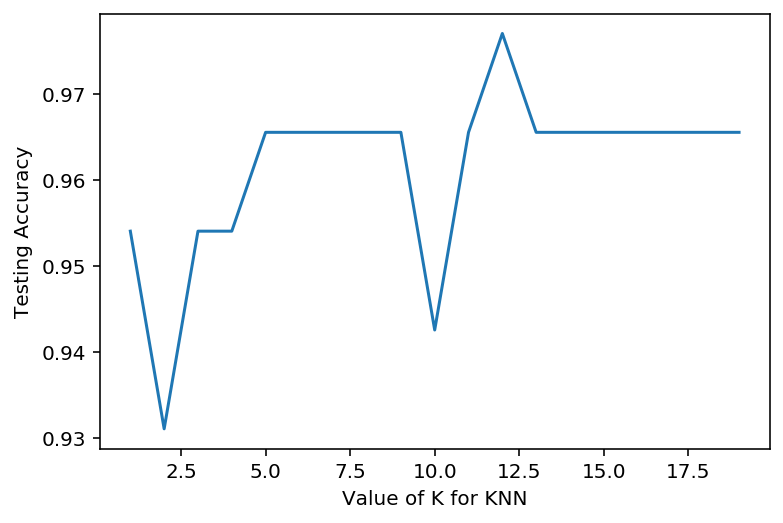

In [36]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

1. Training accuracy rises as model complexity increases
2. Testing accuracy penalizes models that are too complex or not complex enough
3. For KNN models, complexity is determined by the value of K (lower value = more complex). In this case 12 neighbours or more creates a simple model that neither underfits nor overfits the data. I've tried once again with knn=12

In [37]:
# Create a k-NN classifier with 12 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 12)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

#Make predictions on the training set
y_pred = knn.predict(X_test)

# compute classification accuracy for the knn classifier model
print(metrics.accuracy_score(y_test, y_pred))


0.9770114942528736


In [0]:
# I tested with an out-of-sample observation. My sample is modeled on Republican votes.
X_new = [[0,0,1,1,1,0,0,0,1,0,1,1,1,0]]
y_pred = knn.predict(X_new)
y_pred